# F21 AA. CW 1
# TASK 2 Text Processing and Normalization


Import

In [2]:
import pandas as pd
from nltk import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt

# Custom PreprocessAndNorm.pynb module to perform preprocessing and Normalization for function reuse
%run ProcessingAndNorm.ipynb

[nltk_data] Downloading package stopwords to /Users/amit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/amit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Function definitions

In [4]:
def Calculate_Len_NoOfWords(df_reviews):
    df_reviews['length']=df_reviews['Summary_text'].apply(len)
    df_reviews['word_count'] = df_reviews['Summary_text'].apply(lambda x: len(str(x).split()))
    return df_reviews


# function to plot most frequent terms

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

File Input

In [9]:
#Read File
df_reviews = pd.read_csv('train.csv')
df_reviews.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,..."
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...


Format Contents 

In [10]:
df_reviews.Summary.fillna('',inplace=True)
df_reviews.Text.fillna('', inplace=True)
df_reviews['Summary_text']=df_reviews['Summary']+" "+df_reviews['Text']
df_reviews = df_reviews[['Score','Summary_text']]
df_reviews['Score']=df_reviews.Score.astype('category')
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426340 entries, 0 to 426339
Data columns (total 2 columns):
Score           426340 non-null category
Summary_text    426340 non-null object
dtypes: category(1), object(1)
memory usage: 3.7+ MB


In [11]:
df_reviews.head()

,Score,Summary_text
0,5,Very Good I received this product early from t...
1,5,"Organic, Kosher, Tasty Assortment of Premium T..."
2,5,"excellent gluten-free spaghetti: great taste, ..."
3,5,Lindt is Lindt Buying this multi-pack I was mi...
4,5,YUM!!!!! These bars are so good! I loved them ...


In [12]:
df_reviews.describe()

,Score,Summary_text
count,426340,426340
unique,5,309168
top,5,"Filler food is empty, leaves your cat always n..."
freq,272492,140


Add length of summary and word count column

In [13]:
df_reviews=Calculate_Len_NoOfWords(df_reviews)

In [14]:
df_reviews.head()

,Score,Summary_text,length,word_count
0,5,Very Good I received this product early from t...,207,40
1,5,"Organic, Kosher, Tasty Assortment of Premium T...",1998,319
2,5,"excellent gluten-free spaghetti: great taste, ...",1146,204
3,5,Lindt is Lindt Buying this multi-pack I was mi...,201,34
4,5,YUM!!!!! These bars are so good! I loved them ...,164,29


## 1.Processing Experiments

### a) Lower Case Conversion 

In [193]:
df_reviews_copy=df_reviews.copy()

In [194]:
# Check sample text
df_reviews_copy['Summary_text'].loc[1] 

'Organic, Kosher, Tasty Assortment of Premium Teas & Teasans *****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.<br /><br />On the box, the manufacturer 

In [195]:
df_reviews_copy=To_Lower(df_reviews_copy)
df_reviews_copy=Calculate_Len_NoOfWords(df_reviews_copy)

In [196]:
df_reviews_copy['Summary_text'].loc[1]

'organic, kosher, tasty assortment of premium teas & teasans *****<br />numi\'s collection assortment melange includes:<br />5 herbal teas (caffeine-free, also called "teasans"):<br />* dry desert lime: lime herbal teasan<br />* fields of gold: lemongrass herbal teasan<br />* red mellow bush: rooibos herbal teasan<br />* bushmen\'s brew: honeybush herbal teasan<br />* simply mint: moroccan mint<br /><br />2 green teas (lower in caffeine):<br />* temple of heaven: gunpowder green tea<br />* monkey king: jasmine green tea<br /><br />2 black teas (contain caffeine):<br />* chinese breakfast: yunnan black tea<br />* smoky tarry: lapsang souchong black tea<br /><br />this is a total of nine different teas, two tea bags of each one in each box. numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas i have ever tried. they do not include artificial ingredients or flavorings.<br /><br />on the box, the manufacturer 

Discussion: We can see that all the upper case has been changed into lower case. The effect can be seen later on when we create a vector representation which will have a smaller dictionary 

### b) Remove HTML tag from original frame

In [197]:

df_reviews_copy=df_reviews.copy()
# Check sample text
df_reviews_copy['Summary_text'].loc[1] 



'Organic, Kosher, Tasty Assortment of Premium Teas & Teasans *****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.<br /><br />On the box, the manufacturer 

In [198]:
df_reviews_copy=Remove_HTML_Tag(df_reviews_copy)
df_reviews_copy=Calculate_Len_NoOfWords(df_reviews_copy)
df_reviews_copy['Summary_text'].loc[1] 

'Organic, Kosher, Tasty Assortment of Premium Teas & Teasans ***** Numi\'s Collection Assortment Melange includes: 5 Herbal Teas (caffeine-free, also called "teasans"): * Dry Desert Lime: Lime Herbal Teasan * Fields of Gold: Lemongrass Herbal Teasan * Red Mellow Bush: Rooibos Herbal Teasan * Bushmen\'s Brew: Honeybush Herbal Teasan * Simply Mint: Moroccan Mint  2 Green Teas (lower in caffeine): * Temple of Heaven: Gunpowder Green Tea * Monkey King: Jasmine Green Tea  2 Black Teas (contain caffeine): * Chinese Breakfast: Yunnan Black Tea * Smoky Tarry: Lapsang Souchong Black Tea  This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.  On the box, the manufacturer writes: "From mist-covered mountains to sun-drenched deserts to fertile fields, we proudly brin

In [199]:
#Check change in largest 10 review length to see any effect
df_reviews['length'].nlargest(10)

21756     21535
66592     21535
175574    21535
388043    16991
36341     13082
61339     12563
252436    12362
328089    11362
352693    10835
78968     10834
Name: length, dtype: int64

In [200]:
df_reviews_copy['length'].nlargest(10)

21756     21260
66592     21260
175574    21260
388043    16426
36341     12682
61339     12223
252436    12117
328089    11002
352693    10435
78968     10434
Name: length, dtype: int64

Discussion: We can see above that there has been a change in the length after removing the html tag

In [211]:
#Check change in largest 10 review word count to see any effect
df_reviews['word_count'].nlargest(10)

21756     3451
66592     3451
175574    3451
388043    2526
252436    2096
61339     2070
36341     2068
328089    1908
80478     1873
248426    1822
Name: word_count, dtype: int64

In [212]:
df_reviews_copy['word_count'].nlargest(10)

21756     3428
66592     3428
175574    3428
388043    2429
252436    2077
61339     2047
36341     2024
328089    1872
80478     1847
248426    1791
Name: word_count, dtype: int64

Discussion: We can see above that there has been a change in the word count after removing the html tag

In [214]:
# To prove that removing the html tag has an effect we can calcualate average reduction in length and word count


df_reviews_copy['length_change']=df_reviews['length']-df_reviews_copy['length']
df_reviews_copy['wordcount_change']=df_reviews['word_count']-df_reviews_copy['word_count']

df_reviews_copy.head()


,Score,Summary_text,length,word_count,length_change,wordcount_change
0,5,Very Good I received this product early from t...,207,40,0,0
1,5,"Organic, Kosher, Tasty Assortment of Premium T...",1878,313,120,6
2,5,"excellent gluten-free spaghetti: great taste, ...",1126,202,20,2
3,5,Lindt is Lindt Buying this multi-pack I was mi...,201,34,0,0
4,5,YUM!!!!! These bars are so good! I loved them ...,164,29,0,0


In [228]:
print('Average reduction in length per review is',df_reviews_copy['length_change'].sum()/(len(df_reviews_copy['length_change'])),'characters')

Average reduction in length per review is 5.667155322043439 characters


In [229]:
print('Average reduction in number of words per review is',df_reviews_copy['wordcount_change'].sum()/(len(df_reviews_copy['wordcount_change'])),'words')


Average reduction in number of words per review is 0.46527184875920624 words


### c) Remove Special Characters from original frame

In [231]:
df_reviews_copy=df_reviews.copy()
# Check sample text
df_reviews_copy['Summary_text'].loc[1] 


'Organic, Kosher, Tasty Assortment of Premium Teas & Teasans *****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.<br /><br />On the box, the manufacturer 

In [232]:
df_reviews_copy=Remove_Special_Char(df_reviews_copy)
df_reviews_copy=Calculate_Len_NoOfWords(df_reviews_copy)
df_reviews_copy['Summary_text'].loc[1] 

'Organic Kosher Tasty Assortment of Premium Teas  Teasans br Numis Collection Assortment Melange includesbr 5 Herbal Teas caffeinefree also called teasansbr  Dry Desert Lime Lime Herbal Teasanbr  Fields of Gold Lemongrass Herbal Teasanbr  Red Mellow Bush Rooibos Herbal Teasanbr  Bushmens Brew Honeybush Herbal Teasanbr  Simply Mint Moroccan Mintbr br 2 Green Teas lower in caffeinebr  Temple of Heaven Gunpowder Green Teabr  Monkey King Jasmine Green Teabr br 2 Black Teas contain caffeinebr  Chinese Breakfast Yunnan Black Teabr  Smoky Tarry Lapsang Souchong Black Teabr br This is a total of nine different teas two tea bags of each one in each box Numi teas are known for their highquality organic and kosher ingredients and in my opinion are some of the tastiest and best teas I have ever tried They do not include artificial ingredients or flavoringsbr br On the box the manufacturer writes From mistcovered mountains to sundrenched deserts to fertile fields we proudly bring you our tea palett

In [233]:
#Check change in largest 10 review length to see any effect
df_reviews['length'].nlargest(10)

21756     21535
66592     21535
175574    21535
388043    16991
36341     13082
61339     12563
252436    12362
328089    11362
352693    10835
78968     10834
Name: length, dtype: int64

In [234]:
df_reviews_copy['length'].nlargest(10)

21756     20746
66592     20746
175574    20746
388043    14955
36341     12391
61339     11991
252436    11807
328089    10746
78968     10255
352693    10255
Name: length, dtype: int64

In [235]:
#Check change in largest 10 review word count to see any effect
df_reviews['word_count'].nlargest(10)

21756     3451
66592     3451
175574    3451
388043    2526
252436    2096
61339     2070
36341     2068
328089    1908
80478     1873
248426    1822
Name: word_count, dtype: int64

In [236]:
df_reviews_copy['word_count'].nlargest(10)

21756     3433
66592     3433
175574    3433
388043    2433
252436    2070
61339     2069
36341     2048
328089    1908
80478     1872
248426    1822
Name: word_count, dtype: int64

In [237]:
# To prove that removing the html tag has an effect we can calcualate average reduction in length and word count


df_reviews_copy['length_change']=df_reviews['length']-df_reviews_copy['length']
df_reviews_copy['wordcount_change']=df_reviews['word_count']-df_reviews_copy['word_count']

df_reviews_copy.head()

,Score,Summary_text,length,word_count,length_change,wordcount_change
0,5,Very Good I received this product early from t...,200,37,7,3
1,5,Organic Kosher Tasty Assortment of Premium Tea...,1836,308,162,11
2,5,excellent glutenfree spaghetti great taste gre...,1094,204,52,0
3,5,Lindt is Lindt Buying this multipack I was mis...,193,34,8,0
4,5,YUM These bars are so good I loved them warmed...,155,29,9,0


In [238]:
print('Average reduction in length per review is',df_reviews_copy['length_change'].sum()/(len(df_reviews_copy['length_change'])),'characters')


Average reduction in length per review is 18.286302012478302 characters


In [239]:
print('Average reduction in number of words per review is',df_reviews_copy['wordcount_change'].sum()/(len(df_reviews_copy['wordcount_change'])),'words')


Average reduction in number of words per review is 0.39763334427921376 words


### d) Remove Stop words  from original frame

In [15]:
df_reviews_copy=df_reviews.copy()
# Check sample text
df_reviews_copy['Summary_text'].loc[1] 


'Organic, Kosher, Tasty Assortment of Premium Teas & Teasans *****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.<br /><br />On the box, the manufacturer 

In [261]:
df_reviews_copy=Remove_Stopwords(df_reviews_copy)
df_reviews_copy=Calculate_Len_NoOfWords(df_reviews_copy)
df_reviews_copy['Summary_text'].loc[1] 

'organic, kosher, tasty assortment premium teas & teasans *****<br />numi\'s collection assortment melange includes:<br />5 herbal teas (caffeine-free, also called "teasans"):<br />* dry desert lime: lime herbal teasan<br />* fields gold: lemongrass herbal teasan<br />* red mellow bush: rooibos herbal teasan<br />* bushmen\'s brew: honeybush herbal teasan<br />* simply mint: moroccan mint<br /><br />2 green teas (lower caffeine):<br />* temple heaven: gunpowder green tea<br />* monkey king: jasmine green tea<br /><br />2 black teas (contain caffeine):<br />* chinese breakfast: yunnan black tea<br />* smoky tarry: lapsang souchong black tea<br /><br />this total nine different teas, two tea bags one box. numi teas known high-quality, organic kosher ingredients, opinion, tastiest best teas ever tried. include artificial ingredients flavorings.<br /><br />on box, manufacturer writes: "from mist-covered mountains sun-drenched deserts fertile fields, proudly bring tea palette. flavors range

In [262]:
#Check change in largest 10 review length to see any effect
df_reviews['length'].nlargest(10)

21756     21535
66592     21535
175574    21535
388043    16991
36341     13082
61339     12563
252436    12362
328089    11362
352693    10835
78968     10834
Name: length, dtype: int64

In [263]:
df_reviews_copy['length'].nlargest(10)

21756     15969
66592     15969
175574    15969
388043    13705
36341     10459
61339      9044
252436     8906
328089     8470
352693     8432
78968      8431
Name: length, dtype: int64

In [264]:
#Check change in largest 10 review word count to see any effect
df_reviews['word_count'].nlargest(10)

21756     3451
66592     3451
175574    3451
388043    2526
252436    2096
61339     2070
36341     2068
328089    1908
80478     1873
248426    1822
Name: word_count, dtype: int64

In [265]:
df_reviews_copy['word_count'].nlargest(10)

21756     2054
66592     2054
175574    2054
388043    1694
36341     1364
252436    1214
61339     1168
328089    1157
78968     1124
352693    1124
Name: word_count, dtype: int64

In [266]:
# To prove that removing the special characters has an effect we can calcualate average reduction in length and word count


df_reviews_copy['length_change']=df_reviews['length']-df_reviews_copy['length']
df_reviews_copy['wordcount_change']=df_reviews['word_count']-df_reviews_copy['word_count']

df_reviews_copy.head()

,Score,Summary_text,length,word_count,length_change,wordcount_change
0,5,good received product early seller! tastey & g...,120,19,87,21
1,5,"organic, kosher, tasty assortment premium teas...",1599,214,399,105
2,5,"excellent gluten-free spaghetti: great taste, ...",790,109,356,95
3,5,lindt lindt buying multi-pack misled picture w...,147,19,54,15
4,5,yum!!!!! bars good! loved warmed up! definitel...,111,15,53,14


In [267]:
print('Average reduction in length per review is',df_reviews_copy['length_change'].sum()/(len(df_reviews_copy['length_change'])),'characters')



Average reduction in length per review is 147.06529999530892 characters


In [268]:
print('Average reduction in number of words per review is',df_reviews_copy['wordcount_change'].sum()/(len(df_reviews_copy['wordcount_change'])),'words')



Average reduction in number of words per review is 38.25318994229957 words


### e) Before and after comparison when all preprocessing techniques are applied together

In [16]:
df_reviews_p=df_reviews.copy()
# Check sample text
df_reviews_p['Summary_text'].loc[1] 

'Organic, Kosher, Tasty Assortment of Premium Teas & Teasans *****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.<br /><br />On the box, the manufacturer 

In [17]:
df_reviews_p=Perform_Preprocessing(df_reviews_p)
df_reviews_p=Calculate_Len_NoOfWords(df_reviews_p)
df_reviews_p['Summary_text'].loc[1] 

'organic kosher tasty assortment premium teas teasans numis collection assortment melange includes 5 herbal teas caffeinefree also called teasans dry desert lime lime herbal teasan fields gold lemongrass herbal teasan red mellow bush rooibos herbal teasan bushmens brew honeybush herbal teasan simply mint moroccan mint 2 green teas lower caffeine temple heaven gunpowder green tea monkey king jasmine green tea 2 black teas contain caffeine chinese breakfast yunnan black tea smoky tarry lapsang souchong black tea total nine different teas two tea bags one box numi teas known highquality organic kosher ingredients opinion tastiest best teas ever tried include artificial ingredients flavorings box manufacturer writes mistcovered mountains sundrenched deserts fertile fields proudly bring tea palette flavors range smooth earthiness light floral scents refreshingly sweet sour notes share recollection ancient one tamed fire water coexist harmoniously steeped gifts nature since distant past peop

In [271]:
#Check change in largest 10 review length to see any effect
df_reviews['length'].nlargest(10)

21756     21535
66592     21535
175574    21535
388043    16991
36341     13082
61339     12563
252436    12362
328089    11362
352693    10835
78968     10834
Name: length, dtype: int64

In [272]:
df_reviews_p['length'].nlargest(10)

21756     14827
66592     14827
175574    14827
388043    11094
36341      9474
61339      8186
252436     8105
78968      7598
352693     7598
328089     7529
Name: length, dtype: int64

In [273]:
#Check change in largest 10 review word count to see any effect
df_reviews['word_count'].nlargest(10)

21756     3451
66592     3451
175574    3451
388043    2526
252436    2096
61339     2070
36341     2068
328089    1908
80478     1873
248426    1822
Name: word_count, dtype: int64

In [274]:
df_reviews_p['word_count'].nlargest(10)

21756     1965
66592     1965
175574    1965
388043    1518
36341     1287
252436    1138
61339     1106
328089    1078
78968     1068
352693    1068
Name: word_count, dtype: int64

In [18]:
# To prove that preprocessing has an effect we can calcualate average reduction in length and word count


df_reviews_p['length_change']=df_reviews['length']-df_reviews_p['length']
df_reviews_p['wordcount_change']=df_reviews['word_count']-df_reviews_p['word_count']

df_reviews_p.head()


,Score,Summary_text,length,word_count,length_change,wordcount_change
0,5,good received product early seller tastey grea...,110,16,97,24
1,5,organic kosher tasty assortment premium teas t...,1360,193,638,126
2,5,excellent glutenfree spaghetti great taste gre...,702,101,444,103
3,5,lindt lindt buying multipack misled picture wh...,139,19,62,15
4,5,yum bars good loved warmed definitely think gr...,99,14,65,15


In [19]:
print('Average reduction in length per review is',df_reviews_p['length_change'].sum()/(len(df_reviews_p['length_change'])),'characters')




Average reduction in length per review is 172.21420697096215 characters


In [20]:
print('Average reduction in number of words per review is',df_reviews_p['wordcount_change'].sum()/(len(df_reviews_p['wordcount_change'])),'words')




Average reduction in number of words per review is 40.49343481728198 words


Distribution of words before and after preprocessing

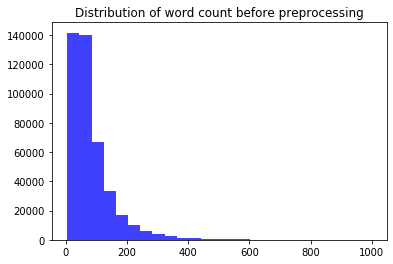

In [297]:
# BEFORE

plt.hist(df_reviews[df_reviews.word_count<1000]['word_count'],25,
         histtype='bar',
         facecolor='b',
         alpha=0.75)
plt.title('Distribution of word count before preprocessing')

plt.show()

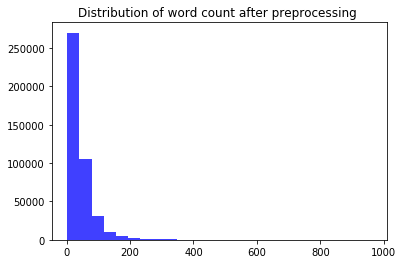

In [301]:
#AFTER 
plt.hist(df_reviews_p[df_reviews_p.word_count<1000]['word_count'],25,
         histtype='bar',
         facecolor='b',
         alpha=0.75)
plt.title('Distribution of word count after preprocessing ')
plt.show()

Top words before and after preprocessing

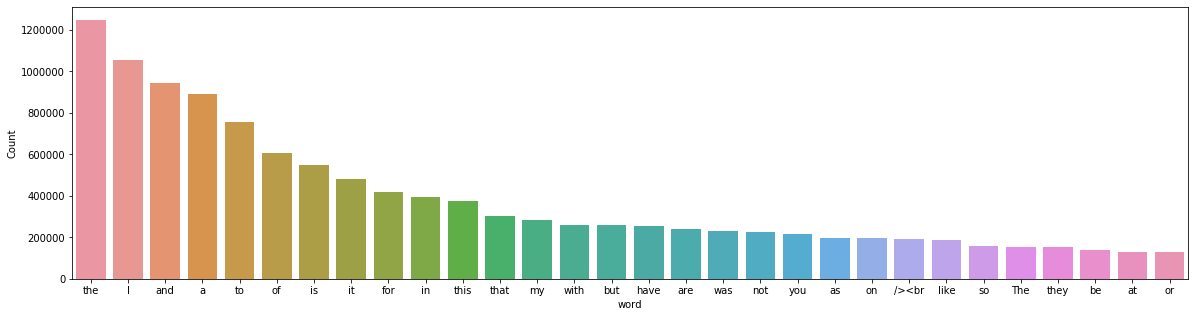

In [291]:
freq_words(df_reviews['Summary_text']) # BEFORE

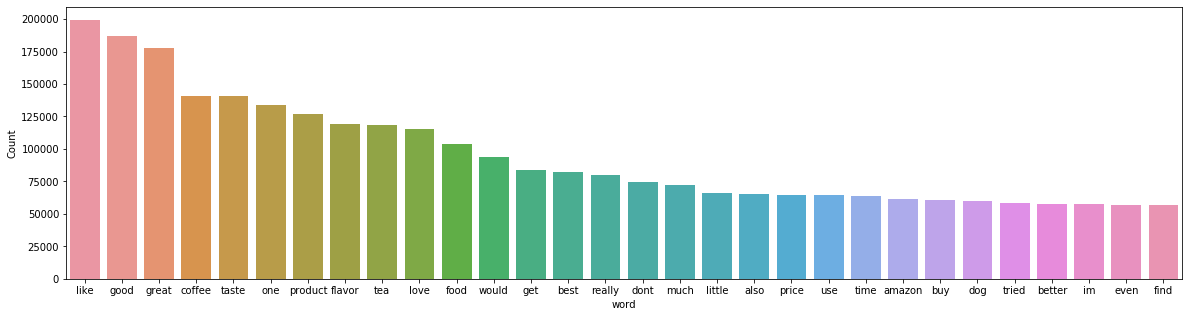

In [292]:
freq_words(df_reviews_p['Summary_text']) #AFTER

## 2.Normalization Experiments

### a) Stemming

In [21]:
df_reviews_p_s=df_reviews_p.copy()

In [22]:
df_reviews_p_s.head()

,Score,Summary_text,length,word_count,length_change,wordcount_change
0,5,good received product early seller tastey grea...,110,16,97,24
1,5,organic kosher tasty assortment premium teas t...,1360,193,638,126
2,5,excellent glutenfree spaghetti great taste gre...,702,101,444,103
3,5,lindt lindt buying multipack misled picture wh...,139,19,62,15
4,5,yum bars good loved warmed definitely think gr...,99,14,65,15


In [23]:
df_reviews_p['Summary_text'].loc[1]

'organic kosher tasty assortment premium teas teasans numis collection assortment melange includes 5 herbal teas caffeinefree also called teasans dry desert lime lime herbal teasan fields gold lemongrass herbal teasan red mellow bush rooibos herbal teasan bushmens brew honeybush herbal teasan simply mint moroccan mint 2 green teas lower caffeine temple heaven gunpowder green tea monkey king jasmine green tea 2 black teas contain caffeine chinese breakfast yunnan black tea smoky tarry lapsang souchong black tea total nine different teas two tea bags one box numi teas known highquality organic kosher ingredients opinion tastiest best teas ever tried include artificial ingredients flavorings box manufacturer writes mistcovered mountains sundrenched deserts fertile fields proudly bring tea palette flavors range smooth earthiness light floral scents refreshingly sweet sour notes share recollection ancient one tamed fire water coexist harmoniously steeped gifts nature since distant past peop

In [24]:
df_reviews_p_s['Summary_text'] = Perform_Stemming(df_reviews_p_s['Summary_text'])

In [308]:
df_reviews_p_s=Calculate_Len_NoOfWords(df_reviews_p_s)
df_reviews_p_s['Summary_text'].loc[1]

'organ kosher tasti assort premium tea teasan numi collect assort melang includ 5 herbal tea caffeinefre also call teasan dri desert lime lime herbal teasan field gold lemongrass herbal teasan red mellow bush rooibo herbal teasan bushmen brew honeybush herbal teasan simpli mint moroccan mint 2 green tea lower caffein templ heaven gunpowd green tea monkey king jasmin green tea 2 black tea contain caffein chines breakfast yunnan black tea smoki tarri lapsang souchong black tea total nine differ tea two tea bag one box numi tea known highqual organ kosher ingredi opinion tastiest best tea ever tri includ artifici ingredi flavor box manufactur write mistcov mountain sundrench desert fertil field proudli bring tea palett flavor rang smooth earthi light floral scent refreshingli sweet sour note share recollect ancient one tame fire water coexist harmoni steep gift natur sinc distant past peopl sooth rous heal explor celebr wonder infus encourag numi finest price perfect big save singl box li

In [309]:
#Check change in largest 10 review length to see any effect
df_reviews_p['length'].nlargest(10)

21756     14827
66592     14827
175574    14827
388043    11094
36341      9474
61339      8186
252436     8105
78968      7598
352693     7598
328089     7529
Name: length, dtype: int64

In [310]:
df_reviews_p_s['length'].nlargest(10)

21756     12861
66592     12861
175574    12861
388043     9677
36341      8230
61339      7114
252436     7043
328089     6828
247696     6679
78968      6669
Name: length, dtype: int64

In [311]:
#Check change in largest 10 review word count to see any effect
df_reviews_p['word_count'].nlargest(10)

21756     1965
66592     1965
175574    1965
388043    1518
36341     1287
252436    1138
61339     1106
328089    1078
78968     1068
352693    1068
Name: word_count, dtype: int64

In [312]:
df_reviews_p_s['word_count'].nlargest(10)

21756     1965
66592     1965
175574    1965
388043    1518
36341     1287
252436    1138
61339     1106
328089    1078
78968     1068
352693    1068
Name: word_count, dtype: int64

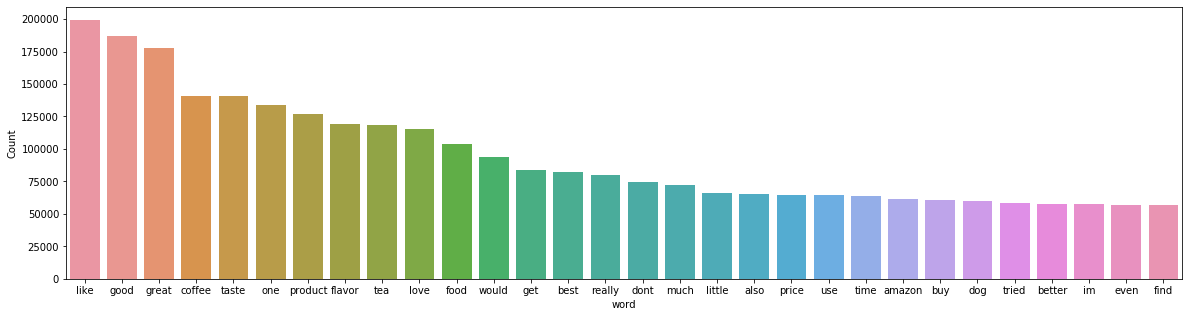

In [313]:
freq_words(df_reviews_p['Summary_text']) # BEFORE

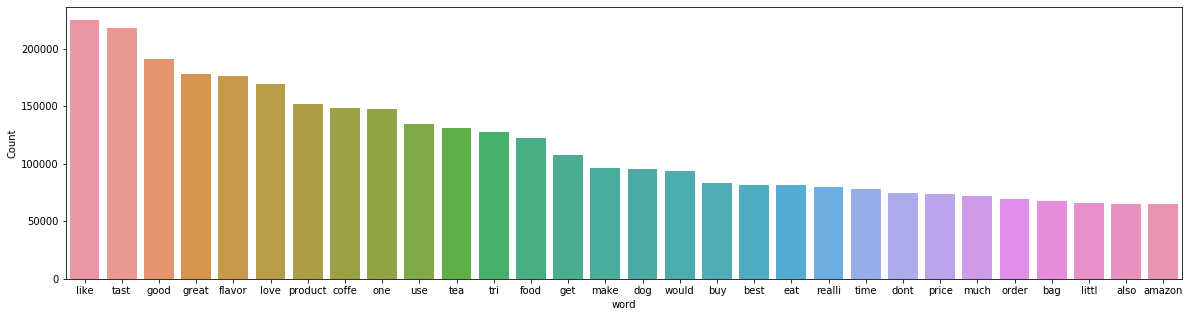

In [314]:
freq_words(df_reviews_p_s['Summary_text']) #AFTER

### b) Lemmatization

In [376]:
df_reviews_p_l=df_reviews_p.copy()

In [377]:
df_reviews_p['Summary_text'].loc[1]

'organic kosher tasty assortment premium teas teasans numis collection assortment melange includes 5 herbal teas caffeinefree also called teasans dry desert lime lime herbal teasan fields gold lemongrass herbal teasan red mellow bush rooibos herbal teasan bushmens brew honeybush herbal teasan simply mint moroccan mint 2 green teas lower caffeine temple heaven gunpowder green tea monkey king jasmine green tea 2 black teas contain caffeine chinese breakfast yunnan black tea smoky tarry lapsang souchong black tea total nine different teas two tea bags one box numi teas known highquality organic kosher ingredients opinion tastiest best teas ever tried include artificial ingredients flavorings box manufacturer writes mistcovered mountains sundrenched deserts fertile fields proudly bring tea palette flavors range smooth earthiness light floral scents refreshingly sweet sour notes share recollection ancient one tamed fire water coexist harmoniously steeped gifts nature since distant past peop

In [378]:
df_reviews_p_l = Perform_Lemmatization(df_reviews_p_l)
df_reviews_p_l=Calculate_Len_NoOfWords(df_reviews_p_l)



In [379]:
df_reviews_p_l['Summary_text'].loc[1]

'organic kosher tasty assortment premium tea teasans numis collection assortment melange includes 5 herbal tea caffeinefree also called teasans dry desert lime lime herbal teasan field gold lemongrass herbal teasan red mellow bush rooibos herbal teasan bushman brew honeybush herbal teasan simply mint moroccan mint 2 green tea lower caffeine temple heaven gunpowder green tea monkey king jasmine green tea 2 black tea contain caffeine chinese breakfast yunnan black tea smoky tarry lapsang souchong black tea total nine different tea two tea bag one box numi tea known highquality organic kosher ingredient opinion tastiest best tea ever tried include artificial ingredient flavoring box manufacturer writes mistcovered mountain sundrenched desert fertile field proudly bring tea palette flavor range smooth earthiness light floral scent refreshingly sweet sour note share recollection ancient one tamed fire water coexist harmoniously steeped gift nature since distant past people soothed roused he

In [382]:
#Check change in largest 10 review length to see any effect
df_reviews_p['length'].nlargest(10)

21756     14827
66592     14827
175574    14827
388043    11094
36341      9474
61339      8186
252436     8105
78968      7598
352693     7598
328089     7529
Name: length, dtype: int64

In [381]:
df_reviews_p_l['length'].nlargest(10)

21756     14556
66592     14556
175574    14556
388043    10818
36341      9277
61339      8042
252436     7923
78968      7436
352693     7436
328089     7428
Name: length, dtype: int64

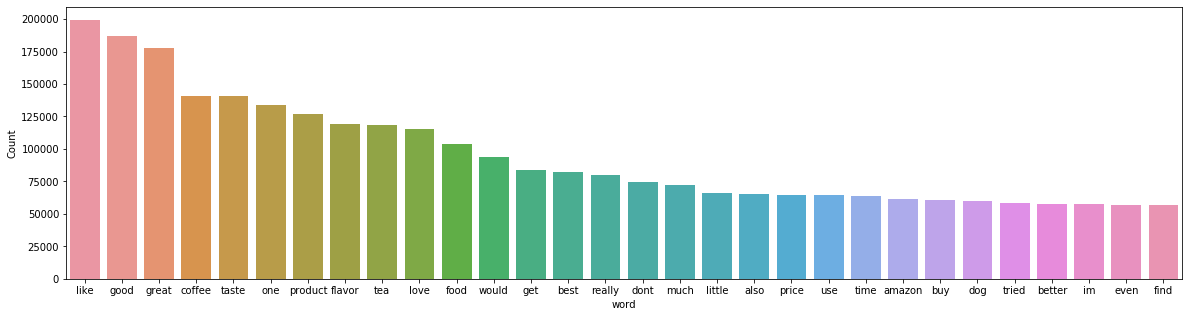

In [383]:
freq_words(df_reviews_p['Summary_text']) # BEFORE

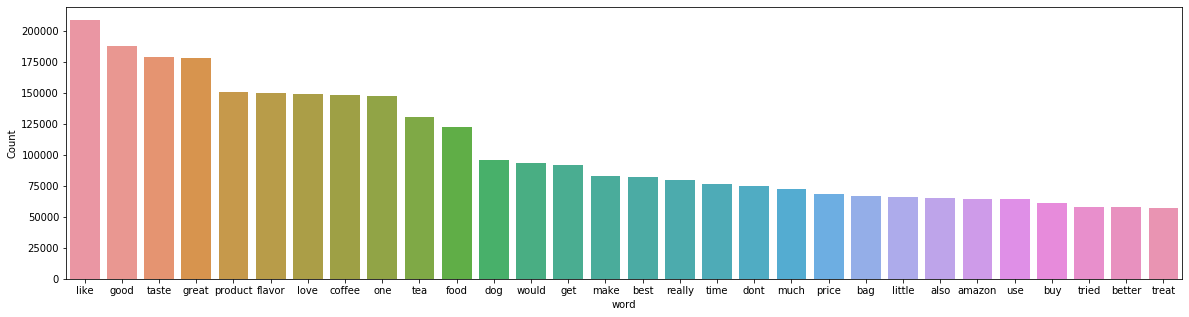

In [384]:
freq_words(df_reviews_p_l['Summary_text']) #AFTER

In [ ]:
# Save both versions of preprocessed data

In [388]:
df_reviews_p_l['length_change']=df_reviews['length']-df_reviews_p_l['length']
df_reviews_p_l['wordcount_change']=df_reviews['word_count']-df_reviews_p_l['word_count']
df_reviews_p_l.to_csv('df_reviews_p_l.csv')

In [389]:
df_reviews_p_s['length_change']=df_reviews['length']-df_reviews_p_s['length']
df_reviews_p_s['wordcount_change']=df_reviews['word_count']-df_reviews_p_s['word_count']
df_reviews_p_s.to_csv('df_reviews_p_s.csv')